In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import math
import re

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold , GridSearchCV , RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import eli5

import xgboost as xgbs
%matplotlib inline

In [2]:
ct_train=pd.read_csv(r'C:\Users\Priyanshi\Downloads\Data (2)\Data\counterfeit_train.csv')
ct_test=pd.read_csv(r'C:\Users\Priyanshi\Downloads\Data (2)\Data\counterfeit_test.csv')

In [3]:
ct_train.shape

(6818, 12)

In [4]:
ct_test.shape

(1705, 11)

In [5]:
ct_train.head(4)

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130


In [6]:
ct_train["Counterfeit_Sales"].sort_values(ascending=True)

5437      146.2900
2943      146.2900
5664      146.9558
3803      147.6216
4031      148.2874
           ...    
5769    10419.5840
502     11106.6896
5999    11558.1020
2128    12230.5600
2743    13199.9648
Name: Counterfeit_Sales, Length: 6818, dtype: float64

In [7]:
ct_train.dtypes

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
dtype: object

In [8]:
ct_train.nunique()

Medicine_ID            1557
Counterfeit_Weight      414
DistArea_ID              10
Active_Since              9
Medicine_MRP           5097
Medicine_Type            16
SidEffect_Level           2
Availability_rating    6317
Area_Type                 4
Area_City_Type            3
Area_dist_level           4
Counterfeit_Sales      3142
dtype: int64

In [9]:
ct_train.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

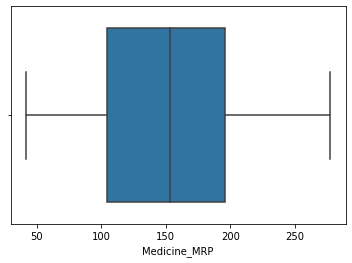

In [10]:
sns.boxplot(x=ct_train.Medicine_MRP); #for outliers.. graph shows no outliers

In [11]:
ct_train["Counterfeit_Weight"].value_counts()

13.450    72
18.900    67
13.100    65
18.000    55
14.950    55
          ..
6.510      1
7.395      1
6.700      1
8.195      1
8.060      1
Name: Counterfeit_Weight, Length: 414, dtype: int64

In [12]:
round(ct_train.groupby("Area_Type")["Counterfeit_Sales"].sum(),2)

Area_Type
CityLimits             2772607.36
DownTown              10849748.42
Industrial             1535691.90
MidTownResidential      390970.49
Name: Counterfeit_Sales, dtype: float64

In [13]:
ct_train.DistArea_ID.value_counts() #ohe

Area017    760
Area046    749
Area013    749
Area035    748
Area049    739
Area045    736
Area027    735
Area018    729
Area010    442
Area019    431
Name: DistArea_ID, dtype: int64

In [14]:
round(ct_train.groupby("DistArea_ID")["Counterfeit_Sales"].mean(),2)

DistArea_ID
Area010     445.99
Area013    2407.02
Area017    2476.01
Area018    2106.57
Area019     449.76
Area027    3772.25
Area035    2529.95
Area045    2311.00
Area046    2358.72
Area049    2442.68
Name: Counterfeit_Sales, dtype: float64

In [15]:
ct_train.Medicine_Type.value_counts()

Hreplacements         976
Antibiotics           970
Antiseptics           724
OralContraceptives    694
Antipyretics          536
Cardiac               522
Mstablizers           514
Tranquilizers         420
Analgesics            356
Antimalarial          339
Antacids              206
Statins               167
MuscleRelaxants       139
Antifungal            111
Stimulants             95
Antiviral              49
Name: Medicine_Type, dtype: int64

In [16]:
round(ct_train.groupby("Medicine_Type")["Counterfeit_Sales"].mean(),2)

Medicine_Type
Analgesics            2091.24
Antacids              2259.88
Antibiotics           2397.20
Antifungal            2444.06
Antimalarial          2192.68
Antipyretics          2292.72
Antiseptics           2366.59
Antiviral             2583.16
Cardiac               2362.98
Hreplacements         2376.12
Mstablizers           2044.87
MuscleRelaxants       2091.09
OralContraceptives    2245.22
Statins               2309.45
Stimulants            2279.97
Tranquilizers         2084.45
Name: Counterfeit_Sales, dtype: float64

In [17]:
ct_train.SidEffect_Level.value_counts()

mild        4434
critical    2384
Name: SidEffect_Level, dtype: int64

In [18]:
ct_train.Area_Type.value_counts()

DownTown              4481
MidTownResidential     873
CityLimits             735
Industrial             729
Name: Area_Type, dtype: int64

In [19]:
ct_train.Area_City_Type.value_counts()

Tier 3    2655
Tier 2    2244
Tier 1    1919
Name: Area_City_Type, dtype: int64

In [20]:
ct_train.Area_dist_level.value_counts()

Medium     2203
Unknown    1938
Small      1928
High        749
Name: Area_dist_level, dtype: int64

In [22]:
x_train,x_test=train_test_split(ct_train,test_size=.2,random_state=1)

In [23]:
x_train1=x_train.drop(["Counterfeit_Sales","Medicine_ID"],1)
y_train1=x_train["Counterfeit_Sales"]

In [24]:
x_test1=x_test.drop(["Counterfeit_Sales","Medicine_ID"],1)
y_test1=x_test["Counterfeit_Sales"]

In [25]:
x_train1.shape, y_train1.shape

((5454, 10), (5454,))

In [26]:
x_test1.shape,y_test1.shape

((1364, 10), (1364,))

In [27]:
num_col=x_train1.select_dtypes(np.number).columns

In [28]:
char_col=x_train1.select_dtypes(object).columns

In [29]:
num_col,char_col

(Index(['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP',
        'Availability_rating'],
       dtype='object'),
 Index(['DistArea_ID', 'Medicine_Type', 'SidEffect_Level', 'Area_Type',
        'Area_City_Type', 'Area_dist_level'],
       dtype='object'))

In [30]:
pipe_num=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())
pipe_char=make_pipeline(OneHotEncoder(handle_unknown="ignore"))


In [31]:
ctrans=make_column_transformer((pipe_num,num_col),(pipe_char,char_col))

In [32]:
ctrans.fit_transform(x_train1)

<5454x43 sparse matrix of type '<class 'numpy.float64'>'
	with 54540 stored elements in Compressed Sparse Row format>

In [33]:
ctrans.transform(ct_test)

<1705x43 sparse matrix of type '<class 'numpy.float64'>'
	with 17050 stored elements in Compressed Sparse Row format>

## linear regression

In [34]:
lm=LinearRegression()

In [35]:
pipe=make_pipeline(ctrans,lm)

In [36]:
pipe

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                           

In [37]:
pipe.fit(x_train1,y_train1)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                           

In [38]:
#dir(pipe)

In [39]:
train_pred=pipe.predict(x_train1)
test_pred=pipe.predict(x_test1)

In [40]:
y_train1.head()

2490    1039.7936
5270    2523.8618
82       302.0872
3960    2757.5576
2362    2965.2872
Name: Counterfeit_Sales, dtype: float64

In [41]:
mean_absolute_error(y_train1,train_pred)


832.7751434859451

In [42]:
mean_absolute_error(y_test1,test_pred)

796.5293566401149

In [43]:
1-(mean_absolute_error(y_test1,test_pred)/1660)

0.5201630381686055

In [44]:
pipe.predict(ct_test)

array([2776.28420262, 3917.82271158, 1467.08533306, ..., 2919.48190019,
       3876.55556363, 3705.1695108 ])

In [45]:
final_test_pred=pipe.predict(ct_test)

In [46]:
len(final_test_pred)

1705

In [47]:
submission=pd.DataFrame(data=final_test_pred)

In [48]:
submission.columns=["Counterfeit_Sales"]

In [49]:
submission["Medicine_ID"]=ct_test.Medicine_ID

In [50]:
submission.head()

,Counterfeit_Sales,Medicine_ID
0,2776.284203,HLZ81
1,3917.822712,ECE94
2,1467.085333,SAD14
3,180.150090,EQV63
4,-105.532403,AIR10


In [51]:
submission=submission[["Medicine_ID","Counterfeit_Sales"]]

In [52]:
submission=submission.to_csv("submission_3.csv",index=False)

## xgboost

In [53]:
strings="xgb__"
parameters={'n_estimators':[40,60,80,100],
            'max_depth':range(2,10,1),
            'learning_rate':[.1,.01,.05],
            'reg_lambda':[.1,.01,1,10],
            'reg_alpha':[.1,.01,1,10]}


In [54]:
parameters.items()

dict_items([('n_estimators', [40, 60, 80, 100]), ('max_depth', range(2, 10)), ('learning_rate', [0.1, 0.01, 0.05]), ('reg_lambda', [0.1, 0.01, 1, 10]), ('reg_alpha', [0.1, 0.01, 1, 10])])

In [55]:
xgb_params={strings+k:v for k,v in parameters.items()}
xgb_params

{'xgb__n_estimators': [40, 60, 80, 100],
 'xgb__max_depth': range(2, 10),
 'xgb__learning_rate': [0.1, 0.01, 0.05],
 'xgb__reg_lambda': [0.1, 0.01, 1, 10],
 'xgb__reg_alpha': [0.1, 0.01, 1, 10]}

In [56]:
xgb=xgbs.XGBRegressor()
pipe=Pipeline([('columntransfer',ctrans),('xgb',xgb)])

In [57]:
grid=RandomizedSearchCV(pipe,xgb_params,cv=5,scoring="neg_mean_absolute_error")

In [58]:
grid

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('columntransfer',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('pipeline-1',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('simpleimputer',
                                                                                                SimpleImputer(add_indicator=False,
                                                                      

In [60]:
grid.fit(x_train1,y_train1);

[20:32:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [61]:
grid.predict(x_train1)

array([ 797.20337, 2429.054  ,  636.00183, ..., 1764.6821 ,  638.15424,
       5442.6646 ], dtype=float32)

In [62]:
grid.predict(ct_test)

array([2453.2388, 3921.9785, 1576.6085, ..., 2953.7725, 3465.0708,
       3869.8489], dtype=float32)

In [63]:
pred_final=grid.predict(ct_test)

In [64]:
mea=mean_absolute_error(y_test1,grid.predict(x_test1))

In [65]:
1-(mea/1660)

0.5673259559453814

In [66]:
pred_final=pd.DataFrame(pred_final)

In [67]:
pred_final.columns=["Counterfeit_Sales"]

In [68]:
pred_final["Medicine_ID"]=ct_test.Medicine_ID

In [69]:
pred_final=pred_final[["Medicine_ID","Counterfeit_Sales"]]

In [70]:
pred_final.head()

,Medicine_ID,Counterfeit_Sales
0,HLZ81,2453.238770
1,ECE94,3921.978516
2,SAD14,1576.608521
3,EQV63,467.551453
4,AIR10,543.388794


In [71]:
ct_test.shape,pred_final.shape

((1705, 11), (1705, 2))

In [72]:
pred_final=pred_final.to_csv("Priyanshi_Project3.csv",index=False)

In [73]:
grid.best_params_

{'xgb__reg_lambda': 0.01,
 'xgb__reg_alpha': 0.01,
 'xgb__n_estimators': 60,
 'xgb__max_depth': 3,
 'xgb__learning_rate': 0.1}

In [74]:
onehotcol=ctrans.named_transformers_['pipeline-2']['onehotencoder'].get_feature_names()

In [75]:
onehotcol

array(['x0_Area010', 'x0_Area013', 'x0_Area017', 'x0_Area018',
       'x0_Area019', 'x0_Area027', 'x0_Area035', 'x0_Area045',
       'x0_Area046', 'x0_Area049', 'x1_Analgesics', 'x1_Antacids',
       'x1_Antibiotics', 'x1_Antifungal', 'x1_Antimalarial',
       'x1_Antipyretics', 'x1_Antiseptics', 'x1_Antiviral', 'x1_Cardiac',
       'x1_Hreplacements', 'x1_Mstablizers', 'x1_MuscleRelaxants',
       'x1_OralContraceptives', 'x1_Statins', 'x1_Stimulants',
       'x1_Tranquilizers', 'x2_critical', 'x2_mild', 'x3_CityLimits',
       'x3_DownTown', 'x3_Industrial', 'x3_MidTownResidential',
       'x4_Tier 1', 'x4_Tier 2', 'x4_Tier 3', 'x5_High', 'x5_Medium',
       'x5_Small', 'x5_Unknown'], dtype=object)

In [76]:
all_col=list(num_col)+list(onehotcol)

In [77]:
df=pd.DataFrame(grid.best_estimator_["xgb"].feature_importances_,index=all_col).reset_index(drop=False)

In [78]:
df.head()

,index,0
0,Counterfeit_Weight,0.006958
1,Active_Since,0.168633
2,Medicine_MRP,0.168004
3,Availability_rating,0.008256
4,x0_Area010,0.000000


In [79]:
df=df.rename({'index':'variables',0:'Importance'},axis=1)

In [80]:
df.head()

,variables,Importance
0,Counterfeit_Weight,0.006958
1,Active_Since,0.168633
2,Medicine_MRP,0.168004
3,Availability_rating,0.008256
4,x0_Area010,0.000000


In [81]:
df=df.sort_values(["Importance"],ascending=False)
df=df.set_index('variables')
df

,Importance
variables,
x3_MidTownResidential,0.385320
Active_Since,0.168633
Medicine_MRP,0.168004
x0_Area027,0.066320
x3_DownTown,0.048138
x1_Antacids,0.020080
x1_Antipyretics,0.015141
x1_Stimulants,0.013614
x4_Tier 3,0.012384
